<a href="https://colab.research.google.com/github/MickeyMamba/Class-1/blob/master/FM_9528_Banking_Analytics_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DefaultRiskperArea.csv')

In [ ]:
raw_data

,fico,mi_pct,cnt_units,cltv,ltv,cnt_borr,occpy_sts_S,channel_C,channel_T,prop_type_MH,prop_type_PU,loan_purpose_N,Area_Number,BinaryDefault
0,1.815482,-2.997902,0.277646,-4.035187,-3.964115,-2.273682,0.148702,-1.594817,-0.035245,-0.501916,-0.949227,-0.493965,634.0,0
1,-0.521829,-2.227060,3.498789,-1.810005,-1.772268,-0.171886,-0.751896,-0.865516,-0.035245,-0.501916,-0.199528,-0.816696,417.0,0
2,-0.457652,-2.095699,10.741067,-1.211170,-1.174970,-1.394290,-0.712228,0.155562,-0.035245,-0.501916,-0.934777,-0.587245,678.0,0
3,0.636380,-0.929451,0.754667,-0.616046,-0.606611,0.626942,-0.663063,-0.827111,-0.035245,-0.501916,-0.676832,-0.666799,490.0,1
4,0.324697,-0.815769,0.896132,-0.609527,-0.580298,0.523027,-0.809006,-0.996611,-0.035245,-0.501916,-0.897400,-0.793784,717.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,-0.635748,-0.537949,-0.504865,-0.636134,-0.624775,1.024542,-0.623887,-1.239433,-0.035245,-0.501916,-0.811021,0.520058,743.0,0
789,0.827999,0.685208,0.690687,0.211616,0.212083,-0.138212,-0.085434,-0.397011,-0.035245,-0.501916,0.017135,-0.821715,388.0,1
790,-0.217318,0.191852,0.590651,0.014400,0.044998,0.129814,0.150415,-0.875257,-0.035245,-0.407222,-0.358295,-0.883066,397.0,0
791,0.165895,-0.935025,0.991450,-0.662455,-0.621446,0.419055,-0.192695,-0.897621,-0.035245,-0.501916,-0.916361,-0.881179,152.0,0


In [ ]:
raw_data.dtypes

fico              float64
mi_pct            float64
cnt_units         float64
cltv              float64
ltv               float64
cnt_borr          float64
occpy_sts_S       float64
channel_C         float64
channel_T         float64
prop_type_MH      float64
prop_type_PU      float64
loan_purpose_N    float64
Area_Number       float64
BinaryDefault       int64
dtype: object

In [ ]:
raw_data.describe()

,fico,mi_pct,cnt_units,cltv,ltv,cnt_borr,occpy_sts_S,channel_C,channel_T,prop_type_MH,prop_type_PU,loan_purpose_N,Area_Number,BinaryDefault
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.00000
mean,0.007120,0.016389,-0.017660,0.013493,0.013376,0.013832,0.004054,0.007604,0.000578,0.006095,0.008061,0.002814,400.582598,0.36570
std,0.984451,0.989389,0.956987,0.993834,0.994099,0.995523,1.006318,1.003580,1.008789,1.007165,1.003446,0.994436,231.753621,0.48193
min,-11.799082,-3.219581,-0.504865,-8.173520,-8.016964,-6.498171,-0.809006,-2.349477,-0.035245,-0.501916,-0.949227,-2.585387,0.000000,0.00000
25%,-0.457652,-0.492901,-0.432656,-0.213919,-0.205172,-0.585534,-0.583392,-0.717448,-0.035245,-0.501916,-0.817361,-0.698534,201.000000,0.00000
50%,0.120364,0.113351,-0.287316,0.211616,0.212033,-0.009781,-0.376927,0.018039,-0.035245,-0.364331,-0.358295,-0.161625,400.000000,0.00000
75%,0.581679,0.678230,0.003386,0.580902,0.586892,0.646004,0.143035,0.640190,-0.035245,0.117718,0.614008,0.486337,600.000000,1.00000
max,2.824215,4.256191,10.741067,2.212681,2.203769,6.541198,5.973082,4.002008,28.372522,10.899360,4.007486,4.867681,805.000000,1.00000


In [ ]:
raw_data.columns

Index(['fico', 'mi_pct', 'cnt_units', 'cltv', 'ltv', 'cnt_borr', 'occpy_sts_S',
       'channel_C', 'channel_T', 'prop_type_MH', 'prop_type_PU',
       'loan_purpose_N', 'Area_Number', 'BinaryDefault'],
      dtype='object')

In [ ]:
raw_data.isnull().any()

fico              False
mi_pct            False
cnt_units         False
cltv              False
ltv               False
cnt_borr          False
occpy_sts_S       False
channel_C         False
channel_T         False
prop_type_MH      False
prop_type_PU      False
loan_purpose_N    False
Area_Number       False
BinaryDefault     False
dtype: bool

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
# Identify the numerical columns
numeric_cols = raw_data.select_dtypes(include=[np.number]).columns
numeric_cols 

Index(['fico', 'mi_pct', 'cnt_units', 'cltv', 'ltv', 'cnt_borr', 'occpy_sts_S',
       'channel_C', 'channel_T', 'prop_type_MH', 'prop_type_PU',
       'loan_purpose_N', 'Area_Number', 'BinaryDefault'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


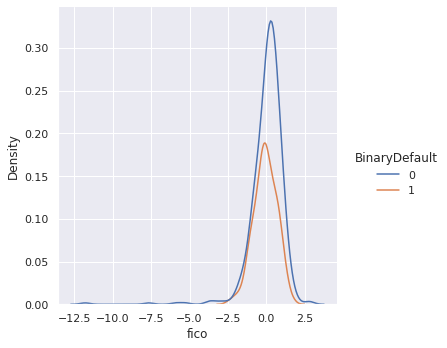

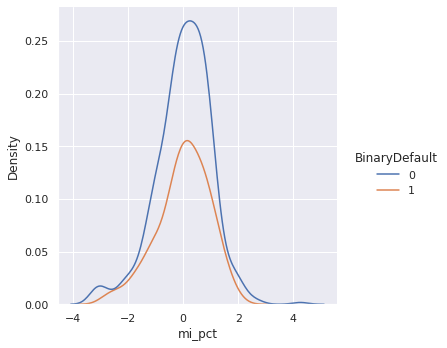

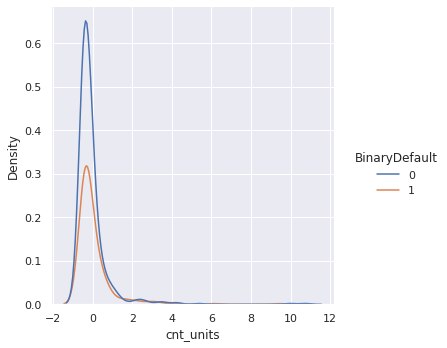

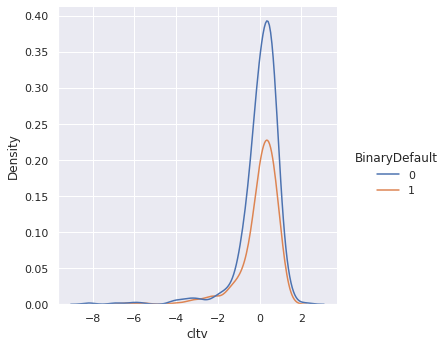

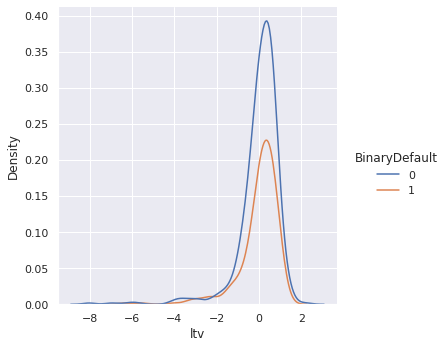

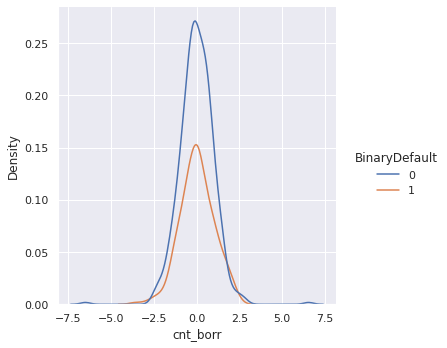

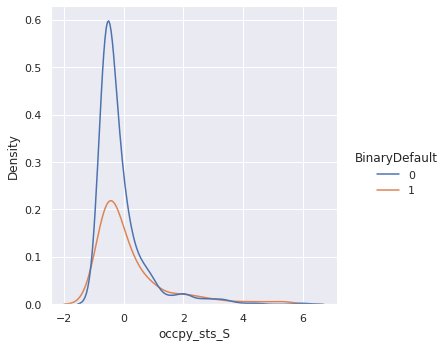

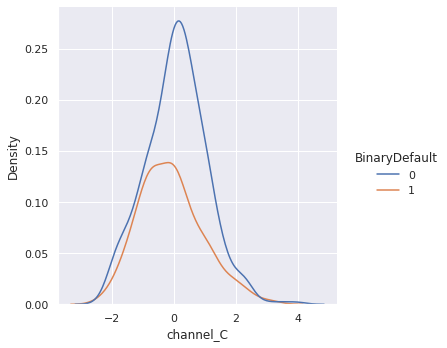

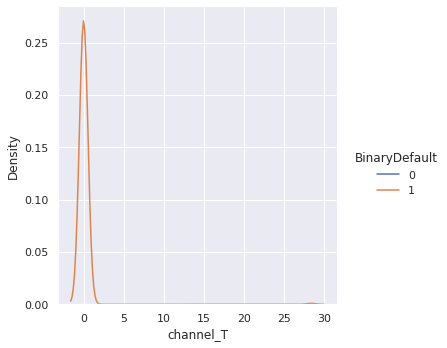

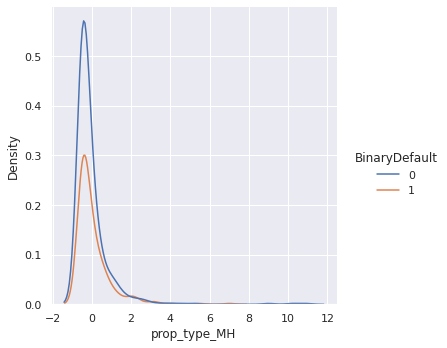

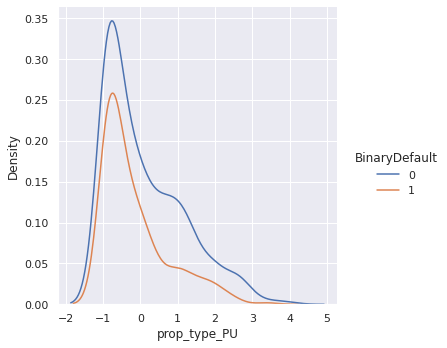

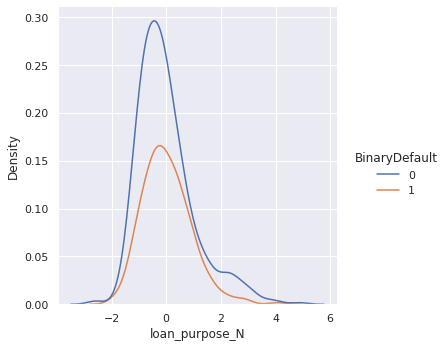

In [ ]:
sns.set(color_codes=True)

for col_id in raw_data.columns[np.r_[0:12]]:
    sns.displot(data = raw_data, x = col_id, hue = "BinaryDefault", kind = 'kde')

In [ ]:
# Activating Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!gdown https://drive.google.com/uc?id=1awfFZf34fNTuLfTixT97teiBgOPaIOwZ

Downloading...
From: https://drive.google.com/uc?id=1awfFZf34fNTuLfTixT97teiBgOPaIOwZ
To: /content/DataC3FM95282020.zip
2.59GB [00:22, 117MB/s] 


In [ ]:
!unzip DataC3FM95282020.zip

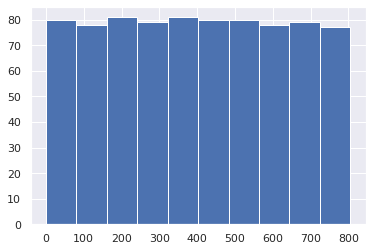

In [ ]:
raw_data.Area_Number.hist()

In [ ]:
!pip install scorecardpy
import scorecardpy as sc
import numpy as np

     |████████████████████████████████| 61kB 3.0MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-cp36-none-any.whl size=57827 sha256=3b45ad2c843c7f2f3f402ed6c5894dc8fd5b6a0aea7adfbe07859f3b4b2b281f
  Stored in directory: /root/.cache/pip/wheels/1d/66/14/23aeb4e1128278f5880580e2fdd10e956de112a5d56a3a043e
Successfully built scorecardpy


In [ ]:
train, test = sc.split_df(raw_data,
                        y = 'BinaryDefault',
                          ratio = 0.7, seed = 251111952).values()

In [ ]:
train

,fico,mi_pct,cnt_units,cltv,ltv,cnt_borr,occpy_sts_S,channel_C,channel_T,prop_type_MH,prop_type_PU,loan_purpose_N,Area_Number,BinaryDefault
0,1.815482,-2.997902,0.277646,-4.035187,-3.964115,-2.273682,0.148702,-1.594817,-0.035245,-0.501916,-0.949227,-0.493965,634.0,0
1,-0.521829,-2.227060,3.498789,-1.810005,-1.772268,-0.171886,-0.751896,-0.865516,-0.035245,-0.501916,-0.199528,-0.816696,417.0,0
2,-0.457652,-2.095699,10.741067,-1.211170,-1.174970,-1.394290,-0.712228,0.155562,-0.035245,-0.501916,-0.934777,-0.587245,678.0,0
3,0.636380,-0.929451,0.754667,-0.616046,-0.606611,0.626942,-0.663063,-0.827111,-0.035245,-0.501916,-0.676832,-0.666799,490.0,1
5,0.286753,-0.842416,1.673203,-0.984939,-0.986210,0.523027,-0.809006,-0.855187,-0.035245,-0.501916,-0.949227,-0.490590,674.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,0.325878,0.064032,0.280016,0.123188,0.133449,0.392607,-0.349060,-0.228220,-0.035245,-0.382843,-0.152686,-0.960501,545.0,0
787,0.104698,0.081632,0.127960,0.128581,0.146855,0.645460,-0.478020,-0.637655,-0.035245,0.282125,0.363528,-0.610003,486.0,0
788,-0.635748,-0.537949,-0.504865,-0.636134,-0.624775,1.024542,-0.623887,-1.239433,-0.035245,-0.501916,-0.811021,0.520058,743.0,0
790,-0.217318,0.191852,0.590651,0.014400,0.044998,0.129814,0.150415,-0.875257,-0.035245,-0.407222,-0.358295,-0.883066,397.0,0


In [ ]:
test

,fico,mi_pct,cnt_units,cltv,ltv,cnt_borr,occpy_sts_S,channel_C,channel_T,prop_type_MH,prop_type_PU,loan_purpose_N,Area_Number,BinaryDefault
4,0.324697,-0.815769,0.896132,-0.609527,-0.580298,0.523027,-0.809006,-0.996611,-0.035245,-0.501916,-0.897400,-0.793784,717.0,0
8,0.379306,-3.157933,9.960540,-4.164756,-4.081051,-0.668806,-0.639132,-0.481991,-0.035245,-0.501916,-0.949227,-1.708555,797.0,0
13,-0.017858,-1.663365,-0.441749,-0.622750,-0.599562,0.853242,-0.809006,-0.063152,-0.035245,-0.501916,-0.949227,-1.051834,719.0,0
18,0.123458,1.828493,0.694876,1.158569,1.171565,-0.571185,-0.656371,-0.686758,-0.035245,-0.501916,-0.880855,-1.246041,473.0,0
21,-0.246955,-0.105330,2.250326,0.041610,0.068374,0.372873,-0.636081,-0.794086,-0.035245,-0.501916,-0.787849,-0.465502,662.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,-0.027963,-1.247229,0.592517,-0.421999,-0.404334,-0.219134,-0.472827,-0.813002,-0.035245,-0.437173,-0.346255,-0.024849,314.0,0
780,0.304841,-0.621984,-0.056170,-0.213919,-0.205172,0.605279,0.247059,-0.897465,-0.035245,0.609910,0.857002,0.156655,203.0,0
784,0.110604,-0.076737,-0.184598,-0.218025,-0.208771,1.806485,-0.473988,-0.290358,-0.035245,0.820737,0.701544,-0.402208,437.0,0
789,0.827999,0.685208,0.690687,0.211616,0.212083,-0.138212,-0.085434,-0.397011,-0.035245,-0.501916,0.017135,-0.821715,388.0,1


In [ ]:
train.to_pickle('train1217.pkl')

In [ ]:
test.to_pickle('test1217.pkl')

In [ ]:
import pandas as pd
train = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/train1217.pkl')

In [ ]:
train1 = train.iloc[:,0:12] 
train1['Default'] = train['BinaryDefault']
train1

,fico,mi_pct,cnt_units,cltv,ltv,cnt_borr,occpy_sts_S,channel_C,channel_T,prop_type_MH,prop_type_PU,loan_purpose_N,Default
0,1.815482,-2.997902,0.277646,-4.035187,-3.964115,-2.273682,0.148702,-1.594817,-0.035245,-0.501916,-0.949227,-0.493965,0
1,-0.521829,-2.227060,3.498789,-1.810005,-1.772268,-0.171886,-0.751896,-0.865516,-0.035245,-0.501916,-0.199528,-0.816696,0
2,-0.457652,-2.095699,10.741067,-1.211170,-1.174970,-1.394290,-0.712228,0.155562,-0.035245,-0.501916,-0.934777,-0.587245,0
3,0.636380,-0.929451,0.754667,-0.616046,-0.606611,0.626942,-0.663063,-0.827111,-0.035245,-0.501916,-0.676832,-0.666799,1
5,0.286753,-0.842416,1.673203,-0.984939,-0.986210,0.523027,-0.809006,-0.855187,-0.035245,-0.501916,-0.949227,-0.490590,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,0.325878,0.064032,0.280016,0.123188,0.133449,0.392607,-0.349060,-0.228220,-0.035245,-0.382843,-0.152686,-0.960501,0
787,0.104698,0.081632,0.127960,0.128581,0.146855,0.645460,-0.478020,-0.637655,-0.035245,0.282125,0.363528,-0.610003,0
788,-0.635748,-0.537949,-0.504865,-0.636134,-0.624775,1.024542,-0.623887,-1.239433,-0.035245,-0.501916,-0.811021,0.520058,0
790,-0.217318,0.191852,0.590651,0.014400,0.044998,0.129814,0.150415,-0.875257,-0.035245,-0.407222,-0.358295,-0.883066,0


In [ ]:
bins1 = sc.woebin(train1, y = 'Default', 
                 min_perc_fine_bin=0.01, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.1, # Minimum information value 
                 max_num_bin=8, # Maximum number of bins
                 method='tree')

[INFO] creating woe binning ...


/usr/local/lib/python3.6/dist-packages/scorecardpy/condition_fun.py:19: UserWarning: There are 1 columns have only one unique values, which are removed from input dataset. 
 (ColumnNames: channel_T)
  warnings.warn("There are {} columns have only one unique values, which are removed from input dataset. \n (ColumnNames: {})".format(len(unique1_cols), ', '.join(unique1_cols)))


Binning on 555 rows and 12 columns in 00:00:17


{'channel_C': <Figure size 432x288 with 2 Axes>,
 'cltv': <Figure size 432x288 with 2 Axes>,
 'cnt_borr': <Figure size 432x288 with 2 Axes>,
 'cnt_units': <Figure size 432x288 with 2 Axes>,
 'fico': <Figure size 432x288 with 2 Axes>,
 'loan_purpose_N': <Figure size 432x288 with 2 Axes>,
 'ltv': <Figure size 432x288 with 2 Axes>,
 'mi_pct': <Figure size 432x288 with 2 Axes>,
 'occpy_sts_S': <Figure size 432x288 with 2 Axes>,
 'prop_type_MH': <Figure size 432x288 with 2 Axes>,
 'prop_type_PU': <Figure size 432x288 with 2 Axes>}

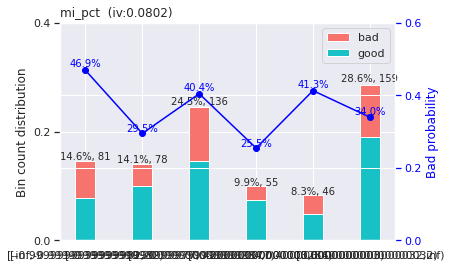

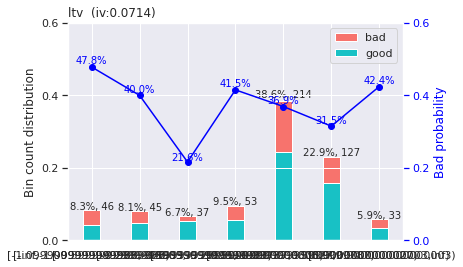

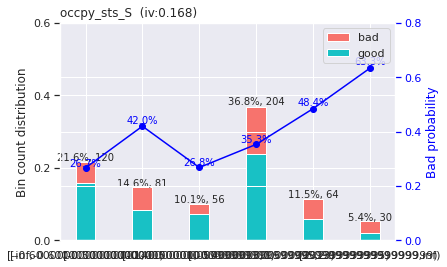

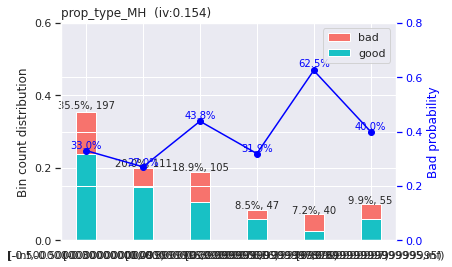

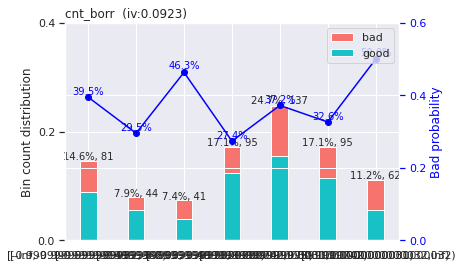

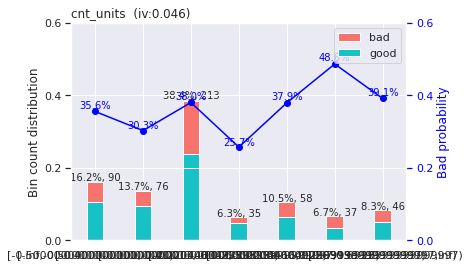

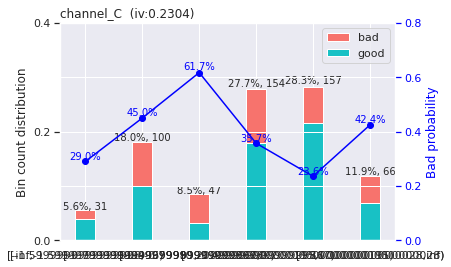

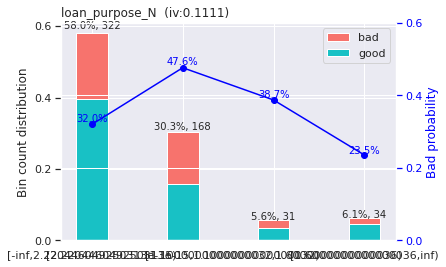

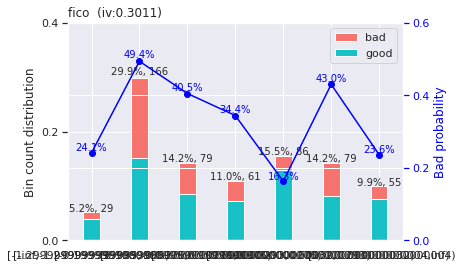

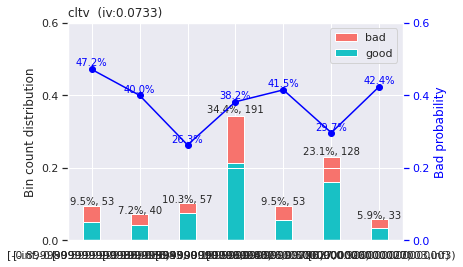

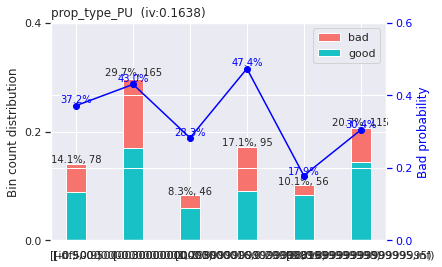

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sc.woebin_plot(bins1)

In [ ]:
train_woe = sc.woebin_ply(train, bins1)

[INFO] converting into woe values ...


In [ ]:
train_woe

,Area_Number,BinaryDefault,channel_T,mi_pct_woe,ltv_woe,occpy_sts_S_woe,prop_type_MH_woe,cnt_borr_woe,cnt_units_woe,channel_C_woe,loan_purpose_N_woe,fico_woe,cltv_woe,prop_type_PU_woe
0,634.0,0,-0.035245,0.426811,0.463414,-0.055711,-0.157989,0.124341,0.057949,0.349755,-0.203918,-0.622295,0.437097,0.025901
1,417.0,0,-0.035245,0.426811,0.463414,-0.461176,-0.157989,-0.425585,0.108592,0.349755,-0.203918,0.526328,0.437097,0.445065
2,678.0,0,-0.035245,0.426811,0.463414,-0.461176,-0.157989,0.124341,0.108592,-0.037361,-0.203918,0.526328,0.437097,0.025901
3,490.0,1,-0.035245,-0.321414,0.144960,-0.461176,-0.157989,-0.174471,0.108592,0.349755,-0.203918,0.270123,0.144960,0.269810
5,674.0,1,-0.035245,-0.321414,0.144960,-0.461176,-0.157989,-0.174471,0.108592,0.349755,-0.203918,-0.093932,0.437097,0.025901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,545.0,0,-0.035245,0.163309,0.014598,-0.055711,-0.442827,0.027904,0.057949,-0.037361,-0.203918,-1.087184,0.070200,0.445065
787,486.0,0,-0.035245,0.163309,0.014598,-0.455097,-0.207261,-0.174471,0.057949,1.027349,-0.203918,-0.093932,0.070200,-0.975631
788,743.0,0,-0.035245,-0.321414,0.144960,-0.461176,-0.157989,-0.174471,-0.044282,0.349755,0.455115,0.526328,0.144960,0.269810
790,397.0,0,-0.035245,0.163309,0.014598,-0.055711,-0.442827,0.027904,0.496358,0.349755,-0.203918,0.526328,0.070200,-0.381133


In [ ]:
test_woe = sc.woebin_ply(test, bins1)

[INFO] converting into woe values ...


In [ ]:
test_woe

,Area_Number,BinaryDefault,channel_T,mi_pct_woe,ltv_woe,occpy_sts_S_woe,prop_type_MH_woe,cnt_borr_woe,cnt_units_woe,channel_C_woe,loan_purpose_N_woe,fico_woe,cltv_woe,prop_type_PU_woe
4,717.0,0,-0.035245,-0.321414,-0.737429,-0.461176,-0.157989,-0.174471,0.108592,0.349755,-0.203918,-1.087184,0.144960,0.269810
8,797.0,0,-0.035245,0.426811,0.463414,-0.461176,-0.157989,0.403822,0.108592,-0.037361,-0.203918,-1.087184,0.437097,0.025901
13,719.0,0,-0.035245,0.426811,-0.737429,-0.461176,-0.157989,-0.174471,-0.284373,-0.037361,-0.203918,0.166013,0.144960,0.025901
18,473.0,0,-0.035245,-0.114551,0.245044,-0.461176,-0.157989,0.403822,0.496358,1.027349,-0.203918,-0.093932,0.245044,0.269810
21,662.0,1,-0.035245,0.163309,0.014598,-0.461176,-0.157989,0.027904,0.108592,1.027349,-0.203918,0.526328,0.070200,0.269810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,314.0,0,-0.035245,0.426811,-0.737429,-0.455097,-0.442827,-0.425585,0.496358,0.349755,-0.203918,0.166013,-0.479194,-0.381133
780,203.0,0,-0.035245,-0.321414,0.207480,-0.055711,1.061251,-0.174471,-0.510447,0.349755,0.455115,-1.087184,-0.479194,-0.975631
784,437.0,0,-0.035245,0.163309,0.207480,-0.455097,1.061251,0.550425,0.062072,-0.037361,-0.203918,-0.093932,-0.479194,-0.975631
789,388.0,1,-0.035245,-0.114551,0.014598,-0.055711,-0.157989,-0.425585,0.496358,-0.037361,-0.203918,0.270123,0.070200,0.445065


In [ ]:
sc.iv(train_woe, 'BinaryDefault')

,variable,info_value
6,fico_woe,0.301136
4,channel_C_woe,0.230415
7,occpy_sts_S_woe,0.167965
12,prop_type_PU_woe,0.163766
1,prop_type_MH_woe,0.154022
10,loan_purpose_N_woe,0.111093
3,cnt_borr_woe,0.092272
2,mi_pct_woe,0.080189
9,cltv_woe,0.073323
8,ltv_woe,0.071378


In [ ]:
train_woe.drop(columns='cnt_borr_woe', inplace = True)
train_woe.drop(columns='mi_pct_woe', inplace = True)
train_woe.drop(columns='cltv_woe', inplace = True)
train_woe.drop(columns='ltv_woe', inplace = True)
train_woe.drop(columns='cnt_units_woe', inplace = True)
train_woe.drop(columns='Area_Number', inplace = True)
train_woe.drop(columns='channel_T', inplace = True)
train_woe

,BinaryDefault,occpy_sts_S_woe,prop_type_MH_woe,channel_C_woe,loan_purpose_N_woe,fico_woe,prop_type_PU_woe
0,0,-0.055711,-0.157989,0.349755,-0.203918,-0.622295,0.025901
1,0,-0.461176,-0.157989,0.349755,-0.203918,0.526328,0.445065
2,0,-0.461176,-0.157989,-0.037361,-0.203918,0.526328,0.025901
3,1,-0.461176,-0.157989,0.349755,-0.203918,0.270123,0.269810
5,1,-0.461176,-0.157989,0.349755,-0.203918,-0.093932,0.025901
...,...,...,...,...,...,...,...
786,0,-0.055711,-0.442827,-0.037361,-0.203918,-1.087184,0.445065
787,0,-0.455097,-0.207261,1.027349,-0.203918,-0.093932,-0.975631
788,0,-0.461176,-0.157989,0.349755,0.455115,0.526328,0.269810
790,0,-0.055711,-0.442827,0.349755,-0.203918,0.526328,-0.381133


In [ ]:
test_woe.drop(columns='cnt_borr_woe', inplace = True)
test_woe.drop(columns='mi_pct_woe', inplace = True)
test_woe.drop(columns='cltv_woe', inplace = True)
test_woe.drop(columns='ltv_woe', inplace = True)
test_woe.drop(columns='cnt_units_woe', inplace = True)
test_woe.drop(columns='Area_Number', inplace = True)
test_woe.drop(columns='channel_T', inplace = True)
test_woe

,BinaryDefault,occpy_sts_S_woe,prop_type_MH_woe,channel_C_woe,loan_purpose_N_woe,fico_woe,prop_type_PU_woe
4,0,-0.461176,-0.157989,0.349755,-0.203918,-1.087184,0.269810
8,0,-0.461176,-0.157989,-0.037361,-0.203918,-1.087184,0.025901
13,0,-0.461176,-0.157989,-0.037361,-0.203918,0.166013,0.025901
18,0,-0.461176,-0.157989,1.027349,-0.203918,-0.093932,0.269810
21,1,-0.461176,-0.157989,1.027349,-0.203918,0.526328,0.269810
...,...,...,...,...,...,...,...
779,0,-0.455097,-0.442827,0.349755,-0.203918,0.166013,-0.381133
780,0,-0.055711,1.061251,0.349755,0.455115,-1.087184,-0.975631
784,0,-0.455097,1.061251,-0.037361,-0.203918,-0.093932,-0.975631
789,1,-0.055711,-0.157989,-0.037361,-0.203918,0.270123,0.445065


In [ ]:
train_woe.to_csv("train_woe1217.csv", index = False)
test_woe.to_csv("test_woe1217.csv", index = False)
!ls # Linux commands to check what files are in the computer.

 Data		        sample_data	   train1217.pkl
 DataC3FM95282020.zip   test1217.pkl	   train_woe1217.csv
 drive		        test_woe1217.csv  'view?usp=sharing'


In [ ]:
import pandas as pd
bankloan_train_WoE = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_woe1217.csv')
bankloan_test_WoE = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_woe1217.csv')

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

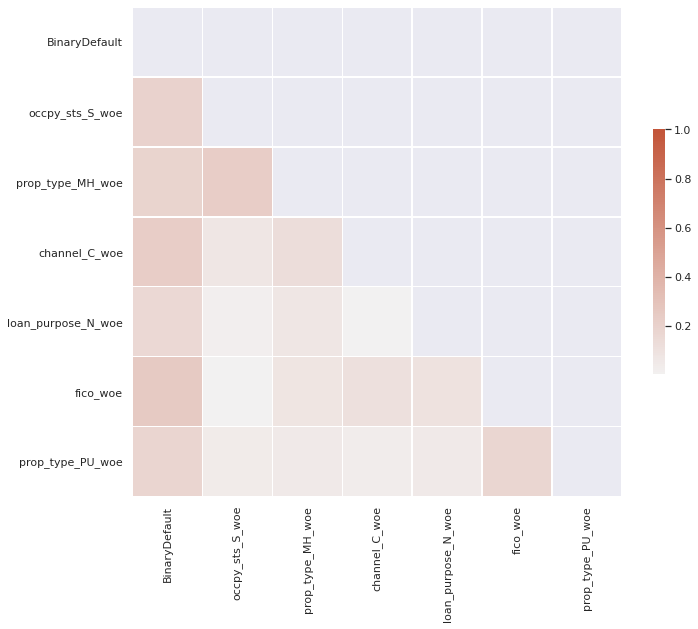

In [ ]:
# Compute the correlation matrix
corr = bankloan_train_WoE.corr()
corr = np.abs(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
corr

,BinaryDefault,occpy_sts_S_woe,prop_type_MH_woe,channel_C_woe,loan_purpose_N_woe,fico_woe,prop_type_PU_woe
BinaryDefault,1.000000,0.197544,0.190298,0.228596,0.160408,0.250428,0.186539
occpy_sts_S_woe,0.197544,1.000000,0.232600,0.076682,0.018671,0.007976,0.044084
prop_type_MH_woe,0.190298,0.232600,1.000000,0.129331,0.071865,0.081472,0.051630
channel_C_woe,0.228596,0.076682,0.129331,1.000000,0.005470,0.112873,0.036201
loan_purpose_N_woe,0.160408,0.018671,0.071865,0.005470,1.000000,0.096201,0.055672
fico_woe,0.250428,0.007976,0.081472,0.112873,0.096201,1.000000,0.177729
prop_type_PU_woe,0.186539,0.044084,0.051630,0.036201,0.055672,0.177729,1.000000


In [ ]:
from sklearn.linear_model import LogisticRegressionCV

bankloan_logreg = LogisticRegressionCV(penalty='l1', # Type of penalization l1 = lasso, l2 = ridge
                                     Cs = 10,        # How many parameters to try. Can also be a vector with parameters to try.
                                     tol=0.01, # Tolerance for parameters
                                     cv = 3,     # How many CV folds to try. 3 or 5 should be enough.
                                     fit_intercept=True, # Use constant?
                                     class_weight='balanced', # Weights, see below
                                     random_state=251111952, # Random seed
                                     max_iter=1000000000, # Maximum iterations
                                     verbose=1, # Show process. 1 is yes.
                                     solver = 'liblinear', # How to optimize.
                                     n_jobs = 4,      # Processes to use. Set to number of physical cores. 
                                     refit = True     # If to retrain with the best parameter and all data after finishing.
                                    )

In [ ]:
bankloan_logreg.fit(X = bankloan_train_WoE.iloc[:, 1:], # All rows and from the second var to end
                    y = bankloan_train_WoE['BinaryDefault'] # The target
                   )

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.2s finished


LogisticRegressionCV(Cs=10, class_weight='balanced', cv=3, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000000000, multi_class='auto', n_jobs=4,
                     penalty='l1', random_state=251111952, refit=True,
                     scoring=None, solver='liblinear', tol=0.01, verbose=1)

In [ ]:
coef_df = pd.concat([pd.DataFrame({'column': bankloan_train_WoE.columns[1:]}), 
                    pd.DataFrame(np.transpose(bankloan_logreg.coef_))],
                    axis = 1
                   )

coef_df

,column,0
0,occpy_sts_S_woe,1.011783
1,prop_type_MH_woe,0.591794
2,channel_C_woe,0.896879
3,loan_purpose_N_woe,0.964139
4,fico_woe,0.855384
5,prop_type_PU_woe,0.893215


In [ ]:
bankloan_logreg.intercept_

array([-0.00148624])

In [ ]:
import tensorflow.keras as keras

In [ ]:
import numpy as np
import h5py as h5py
import PIL

# Others
import numpy as np
from sklearn.model_selection import train_test_split

# For AUC estimation and ROC plots
from sklearn.metrics import roc_curve, auc

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Image and directories
import cv2
import os

In [ ]:
# Parameters
ImageSize = (500,500)
BatchSize = 32

In [ ]:
# Import base model. Using Xception.
from tensorflow.keras.applications.Xception import Xception, preprocess_input
model = Xception(weights = 'imagenet',      # The weights from the ImageNet competition
              include_top = False,       # Do not include the top layer, which classifies.
              input_shape= (500, 500, 3) # Input shape. Three channels, and BGR (NOT RGB!!!)
             )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow import keras

ImageOnlyModel = Sequential()
for layer in model.layers:
    ImageOnlyModel.add(layer)

for layer in ImageOnlyModel.layers:
    layer.trainable = True


In [ ]:
# Compiling the model! Note the learning rate.
opt = optimizers.Adam(lr=0.001, decay=0.9/ 3000000) # Learning rate needs to be tweaked for convergence.
ImageOnlyModel.compile(loss='mean_absolute_percentage_error', # This is NOT a classification problem!
                      optimizer=opt
                       )

In [ ]:
ImagePath = 'Data'
raw_data['path'] = [os.path.join(ImagePath, str(i) + '.jpg') for i in DeprecationWarning.index.values]

In [ ]:
 Create a train / test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(raw_data, 
                               test_size = 0.3,
                               random_state = 251111952)

In [ ]:
# Define parameters

target_size = (500, 500)
batch_size = 32
DataDir = 'raw_data'

# Define generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                                  rescale=1. / 255,                         # NNets like small inputs. Rescale.
                                  shear_range=0,                          # Shear?
                                  zoom_range=0.2,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=False,                     # Flip horizontally?
                                  vertical_flip=False,                      # Flip vertically?
                                  preprocessing_function=preprocess_input,  
                                  validation_split = 0.2                  
                                  )

test_datagen = ImageDataGenerator(
                                  rescale=1. / 255,                         # NNets like small inputs. Rescale.
                                  shear_range=0,                          # Shear?
                                  zoom_range=0.2,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=False,                     # Flip horizontally?
                                  vertical_flip=False,                      # Flip vertically?
                                  preprocessing_function=preprocess_input,  
                                  )

train_generator = train_datagen.flow_from_dataframe(train,
                                                    directory='.',  # Look from root directory
                                                    x_col='path',   # Path to images
                                                    y_col='BinaryDefault',  # Target
                                                    target_size=target_size, # Same as last lab
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='raw',
                                                    subset='training',
                                                    interpolation="bilinear"
                                                   )

validation_generator = train_datagen.flow_from_dataframe(train,
                                                    directory='.',
                                                    x_col='path',
                                                    y_col='BinaryDefault',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='raw',
                                                    subset='validation',
                                                    interpolation="bilinear"
                                                   )

test_generator = test_datagen.flow_from_dataframe(test,
                                                  directory='.',
                                                  x_col='path',
                                                  y_col='BinaryDefault',
                                                  target_size=target_size,
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  class_mode='raw',
                                                  interpolation="bilinear"
                                                  )

In [ ]:
# Number of epochs
epochs = 108

# Train!
ImageOnlyModel.fit(
                  train_generator,
                  epochs=epochs,
                  validation_data=validation_generator,
                  steps_per_epoch = 60, # Usually cases / batch_size = 60.
                  validation_steps = 15 # Number of validation steps. Again cases / batch_size = 15.
                  )

In [ ]:
# Plotting training history.
loss = ImageOnlyModel.history.history['loss']
val_loss = ImageOnlyModel.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Applying to the test set with a generator.
test_generator.reset()

# Get probabilities
output = ImageOnlyModel.predict(test_generator)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape = mean_absolute_percentage_error(test_generator.labels, output)
print('The mean absolute percentual error over the test is %.2f%%' % mape)

In [ ]:
# Import preprocessors
from sklearn.preprocessing import MinMaxScaler


In [ ]:
import tensorflow as tf
image_input = tf.keras.Input(shape=ImageSize + (3,), name = 'image_input')

Xception_input = Xception(weights='imagenet', include_top=False)

ImageClassifier = Xception_input(image_input)


merged = concatenate([ImageClassifier, Structured])

raw_data_multi = Dense(1, activation='relu', name="raw_data_multi")(merged)

multimodal_model = keras.Model(inputs=[image_input, features_input], 
                               outputs=[raw_data_multi])

In [ ]:
# Compile with same optimizer as before.
multimodal_model.compile(optimizer = opt, 
                    loss='mean_absolute_percentage_error')

In [ ]:
import pydot as pyd
from tensorflow.keras.utils import plot_model

#Visualize Model
plot_model(
          multimodal_model, to_file='model.png', show_shapes=False, show_layer_names=True,
          rankdir='TB', expand_nested=False, dpi=96
          )

In [ ]:
# Define parameters

target_size = (500, 500)
batch_size = 32
DataDir = 'raw_data'


# We only modify the generators. Note the y vector.
train_generator = train_datagen.flow_from_dataframe(train,
                                                    directory='.',
                                                    x_col='path',
                                                    y_col=train.columns[pred_cols],
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='raw',
                                                    subset='training',
                                                    interpolation="bilinear"
                                                   )

validation_generator = train_datagen.flow_from_dataframe(train,
                                                    directory='.',
                                                    x_col='path',
                                                    y_col=train.columns[pred_cols],
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='raw',
                                                    subset='validation',
                                                    interpolation="bilinear"
                                                   )

test_generator = train_datagen.flow_from_dataframe(test,
                                                    directory='.',
                                                    x_col='path',
                                                    y_col=test.columns[pred_cols],
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='raw',
                                                    subset='training',
                                                    interpolation="bilinear"
                                                   )

# Define combined generator
def train_generator_func():
    count = 0

    while True:
        if  count == len(train.index):
            train_generator.reset()
            break
        count += 1
        data = train_generator.next()



def validation_generator_func():
    count = 0
    while True:
        if count == len(train.index):
            validation_generator.reset()
            break
        count += 1
        data = validation_generator.next()


In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size
multimodal_model.fit(train_generator_func(),
                      epochs=108,
                      steps_per_epoch=steps_per_epoch,
                      validation_data=validation_generator_func(),
                      validation_steps=validation_steps
                     )

In [ ]:
loss = multimodal_model.history.history['loss']
val_loss = multimodal_model.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Calculate outputs in test set
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size

raw_data_test = multimodal_model.predict(test_generator_func(),
                                    steps=STEP_SIZE_TEST+1,
                                    verbose=1)

In [ ]:
mape = mean_absolute_percentage_error(test_generator.labels, raw_data_test)
print('The mean absolute percentual error over the test is %.2f%%' % mape)